In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with SGD optimizer and learning rate scheduling
initial_learning_rate = 0.01
lr_schedule = LearningRateScheduler(lambda epoch: initial_learning_rate * 0.9 ** epoch)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

model.compile(optimizer=SGD(learning_rate=initial_learning_rate, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(train_images)

# Train the model with data augmentation and learning rate scheduling
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=5, validation_data=(test_images, test_labels),
                    callbacks=[lr_schedule, early_stopping])



Epoch 1/5
938/938 [==============================] - 294s 314ms/step - loss: 0.2311 - accuracy: 0.9303 - val_loss: 0.0459 - val_accuracy: 0.9860 - lr: 0.0100
Epoch 2/5
938/938 [==============================] - 287s 306ms/step - loss: 0.1271 - accuracy: 0.9625 - val_loss: 0.0347 - val_accuracy: 0.9884 - lr: 0.0090
Epoch 3/5
938/938 [==============================] - 278s 297ms/step - loss: 0.0956 - accuracy: 0.9717 - val_loss: 0.0358 - val_accuracy: 0.9890 - lr: 0.0081
Epoch 4/5
938/938 [==============================] - 276s 294ms/step - loss: 0.0806 - accuracy: 0.9761 - val_loss: 0.0260 - val_accuracy: 0.9917 - lr: 0.0073
Epoch 5/5
938/938 [==============================] - 277s 295ms/step - loss: 0.0665 - accuracy: 0.9807 - val_loss: 0.0228 - val_accuracy: 0.9917 - lr: 0.0066


313/313 [==============================] - 18s 57ms/step - loss: 0.0228 - accuracy: 0.9917
Test accuracy: 0.9916999936103821


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


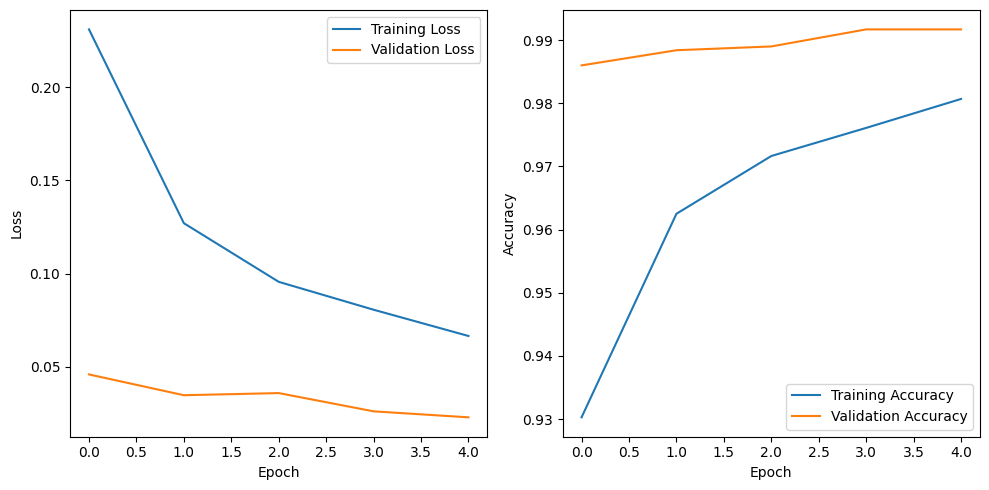

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('mnist_cnn_augmented_model.h5')

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 276ms/step


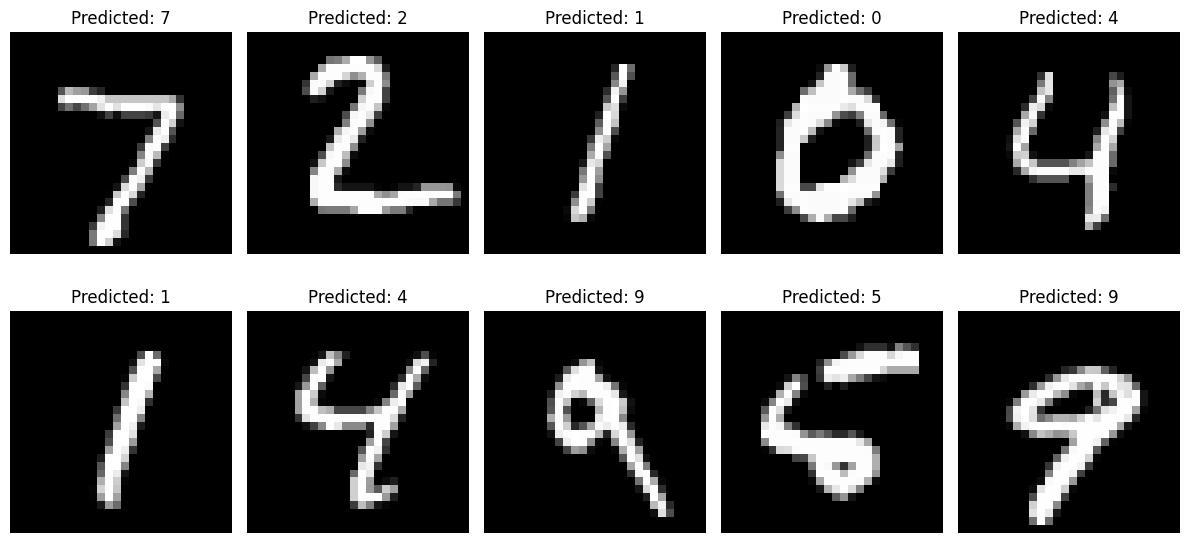

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Example of making predictions and visualizing them
num_images = 10
predictions = model.predict(test_images[:num_images])
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
